In [1]:
#importamos todos los paquetes necesarios
import os
import numpy as np 
from numpy import loadtxt
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense, Dropout

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

from math import pi
from scipy.cluster.hierarchy import dendrogram, ward, single, complete, average, linkage, fcluster
from scipy.spatial.distance import pdist

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from scipy import stats
from scipy.cluster import hierarchy

from tslearn.clustering import TimeSeriesKMeans
from tslearn.clustering import KShape




from imblearn.over_sampling import SMOTE

from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score,roc_auc_score, accuracy_score
from sklearn.metrics import matthews_corrcoef
from sklearn.tree import export_graphviz
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import roc_curve
from IPython.display import Image  
from sklearn import tree
from sklearn.svm import SVC
from sklearn.metrics import make_scorer
#import pydotplus
pd.set_option('display.max_columns', None)

%matplotlib notebook
%matplotlib inline

Using TensorFlow backend.


In [2]:
train100 = pd.read_csv('/Users/daniel.rodriguez/Documents/DDD/ACC/ACC_PROOF/ACC1/final_datasets/train100_fin.csv', sep = ',',index_col = False)
test100 = pd.read_csv('/Users/daniel.rodriguez/Documents/DDD/ACC/ACC_PROOF/ACC1/final_datasets/test100_fin.csv', sep = ',',index_col = False)

In [3]:
X, y = train100[[#'Unnamed: 0', 
                 #'X', 
                 #'Y', 
                 'attraction', 
                 'bank', 
                 'bar', 
                 'cetram', 
                 'cinema', 
                 'college', 
                 'crossing', 
                 'cruce_peligroso', 
                 'hospital',  
                 'hotel', 
                 'interseccion', 
                 'kindergarten', 
                 'mall', 
                 'metro', 
                 'metrobus', 
                 'mini_roundabout', 
                 'museum', 
                 'nightclub', 
                 'park', 
                 'pub', 
                 'restaurant', 
                 'rtp', 
                 'school', 
                 'speed_camera', 
                 'supermarket', 
                 'theatre', 
                 'traffic_signals', 
                 'trolebus', 
                 'turning_circle', 
                 'university',
                 
                 'bar_300',
                 'crossing_300',
                 'hospital_300',
                 'hotel_300',
                 'metro_300',
                 'nightclub_300',
                 'restaurant_300', 
                 'rtp_300',
                 'school_300',
                 'speed_camera_300',
                 'traffic_signals_300',
                 
                 'ACC_C_LESION_100',
                 'ACC_FATAL_100', 
                 'ACC_PRENSADO_100', 
                 'ACC_S_LESION_100',
                 'ATROPELLADO_100', 
                 'ATROPELLADO_FATAL_100',
                 'FERROVIARIO_100',
                 'MOTOCICLISTA_100',
                 'OTROS_100',
                 'PER_ATRAPADO_DESBARRANCADO_100',
                 'VEH_ATRAPADO_100',
                 'VEH_DESBARRANCADO_100', 
                 'VOLCADURA_100',

                 'ACC_C_LESION_200', 
                 'ACC_FATAL_200',
                 'ACC_PRENSADO_200', 
                 'ACC_S_LESION_200', 
                 'ATROPELLADO_200',
                 'ATROPELLADO_FATAL_200', 
                 'FERROVIARIO_200', 
                 'MOTOCICLISTA_200', 
                 'OTROS_200', 
                 'PER_ATRAPADO_DESBARRANCADO_200', 
                 'VEH_ATRAPADO_200', 
                 'VEH_DESBARRANCADO_200',
                 'VOLCADURA_200']],train100[['SINIESTRO']]

In [4]:
print(X.var()['attraction'])
print(X.var()['bank'])
print(X.var()['cetram'])
print(X.var()['cinema'])
print(X.var()['college'])
print(X.var()['crossing'])
print(X.var()['cruce_peligroso'])
print(X.var()['hospital'])
print(X.var()['hotel'])
print(X.var()['interseccion'])
print(X.var()['kindergarten'])
print(X.var()['mall'])
print(X.var()['metro'])
print(X.var()['mini_roundabout'])

0.0005817284459247818
0.0067349258793919795
0.00046534737850571127
0.0005605458402054574
0.00011637748481308409
0.011698384535451078
0.0055632850839490615
0.0013845259605308401
0.002049246593690976
0.9733990899838207
0.0005182003330997328
0.000158689852813436
0.0019856813113288204
0.000687517874614879


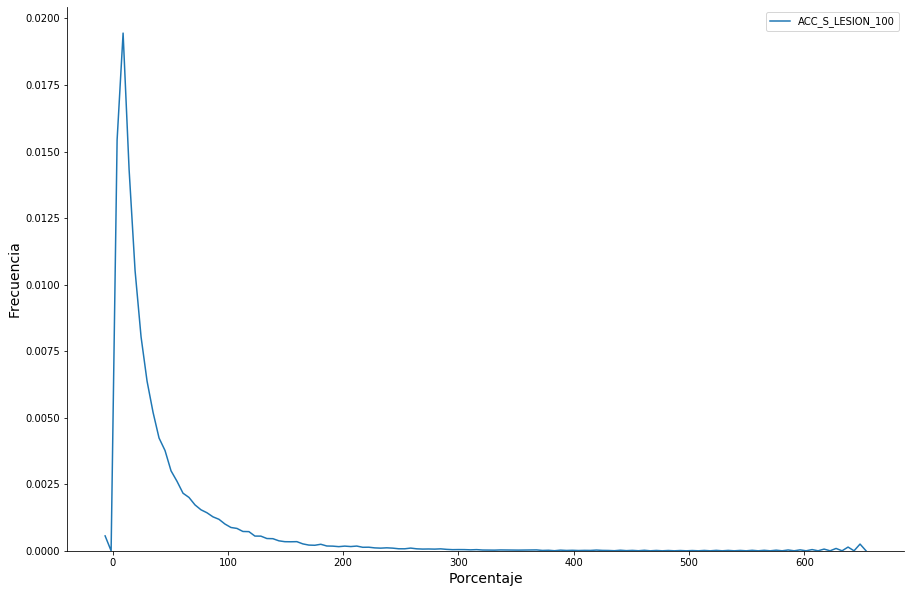

In [10]:
fig, ax = plt.subplots(figsize = (15, 10))

#ax.hist(X['interseccion'], bins = 50, color = '#6baed6',ec ='black',alpha=0.3, label = '2019')
sns.kdeplot(X.ACC_S_LESION_100)
#ax.hist(reg3.pobreza, bins = dbins, ec ='black',color = '#74a9cf',alpha=0.5, label = 'MUN_REGRESION',density = True)
#plt.yscale('log')
ax.set_ylabel('Frecuencia',fontsize = 14)
ax.set_xlabel('Porcentaje', fontsize = 14)
#plt.xticks(rotation = 45)
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)
#plt.xlim(0,8000)
#plt.text(1500, 6167951.32, "Col: Parque Ind. Eco. Leon/ Pob: 0/ Ventas: $6,167,951.32", horizontalalignment='left', size='medium', color='black', weight='semibold',fontsize = 12)
#plt.text(20, 120, r'N = 23,855, mean = 2.04,  std = 4.973,  max = 150,  min = 1', fontsize=14)
#plt.title("Población sin derechohabiencia", loc='left', fontsize=20, fontweight=0, color='darkred')

#plt.axvline(0.34082, color='#74c476', linewidth=2.5, linestyle = '--',alpha = 1)
#plt.text(0.32, 80, 'Tijuana 34%', color = 'green', rotation = 90, alpha = 1, fontsize=15)
#
#plt.axvline(0.23, color='#6baed6', linewidth=2.5, linestyle = '--',alpha = 1)
#plt.text(0.24, 80, 'Monterrey 23%', color = 'blue', rotation = 90, alpha = 1, fontsize=15)
#
#plt.axvline(0.35, color='#fd8d3c', linewidth=2.5, linestyle = '--',alpha = 1)
#plt.text(0.36, 80, 'Guadalajara 35%', color = 'red', rotation = 90, alpha = 1, fontsize=15)

#plt.text(hom1619_ts_m.iloc[36,0], 100, '  Cambio %\nSept19 vs. Dic18', color = 'green', alpha = 0.5, fontsize=18)
#ax.fill_between(rango1[3400:].DIAS,15,0, color='#756bb1', alpha=.2)
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left() 
#ax.legend()
#fig.savefig('/Users/daniel.rodriguez/Documents/2020/Montepío/variables/tres_sinder.png', format = 'png', dpi = 200, bbox_inches = 'tight')

In [8]:
print(X.std()['attraction'])

0.02411904736768809


In [9]:
print(X.max()['attraction'])

3


In [18]:
X.var()['ATROPELLADO_200']

556.3666434976178

In [19]:
X.columns

Index(['attraction', 'bank', 'bar', 'cetram', 'cinema', 'college', 'crossing',
       'cruce_peligroso', 'hospital', 'hotel', 'interseccion', 'kindergarten',
       'mall', 'metro', 'metrobus', 'mini_roundabout', 'museum', 'nightclub',
       'park', 'pub', 'restaurant', 'rtp', 'school', 'speed_camera',
       'supermarket', 'theatre', 'traffic_signals', 'trolebus',
       'turning_circle', 'university', 'bar_300', 'crossing_300',
       'hospital_300', 'hotel_300', 'metro_300', 'nightclub_300',
       'restaurant_300', 'rtp_300', 'school_300', 'speed_camera_300',
       'traffic_signals_300', 'ACC_C_LESION_100', 'ACC_FATAL_100',
       'ACC_PRENSADO_100', 'ACC_S_LESION_100', 'ATROPELLADO_100',
       'ATROPELLADO_FATAL_100', 'FERROVIARIO_100', 'MOTOCICLISTA_100',
       'OTROS_100', 'PER_ATRAPADO_DESBARRANCADO_100', 'VEH_ATRAPADO_100',
       'VEH_DESBARRANCADO_100', 'VOLCADURA_100', 'ACC_C_LESION_200',
       'ACC_FATAL_200', 'ACC_PRENSADO_200', 'ACC_S_LESION_200',
       'ATROPELLAD

In [9]:
X.ACC_S_LESION_100.value_counts(normalize = True)

0      0.276764
1      0.051666
2      0.039266
3      0.031118
4      0.029690
         ...   
398    0.000011
554    0.000011
604    0.000011
298    0.000011
378    0.000011
Name: ACC_S_LESION_100, Length: 479, dtype: float64

In [14]:
X.iloc[:,10:11]

,interseccion
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
        52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67]),
 <a list of 67 Text xticklabel objects>)

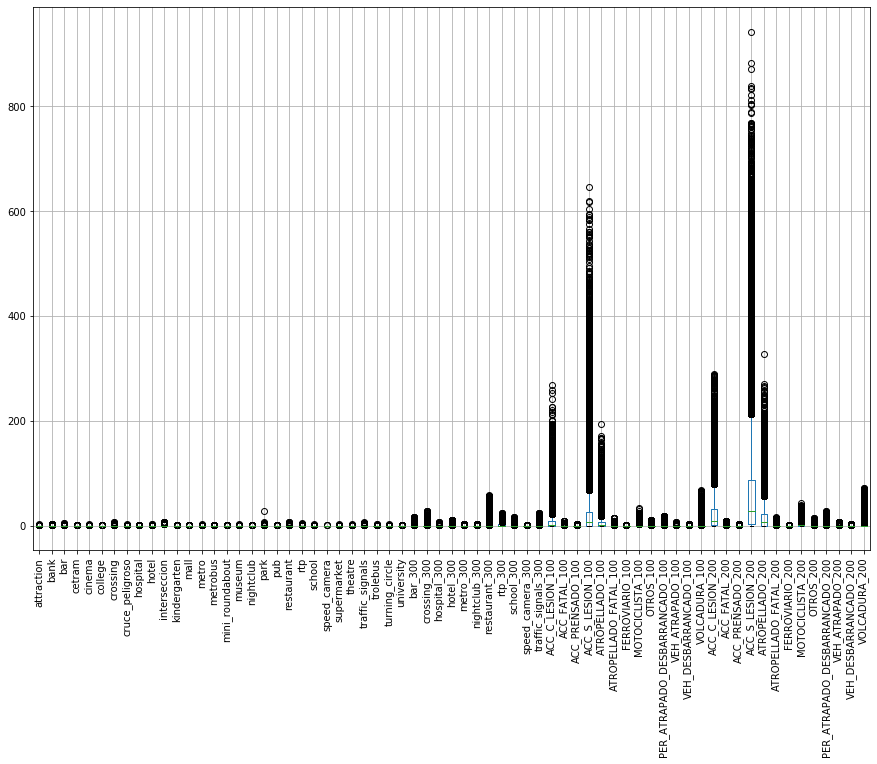

In [17]:
fig, ax = plt.subplots(figsize = (15, 10))
X.boxplot(ax = ax)
plt.xticks(rotation = 90)

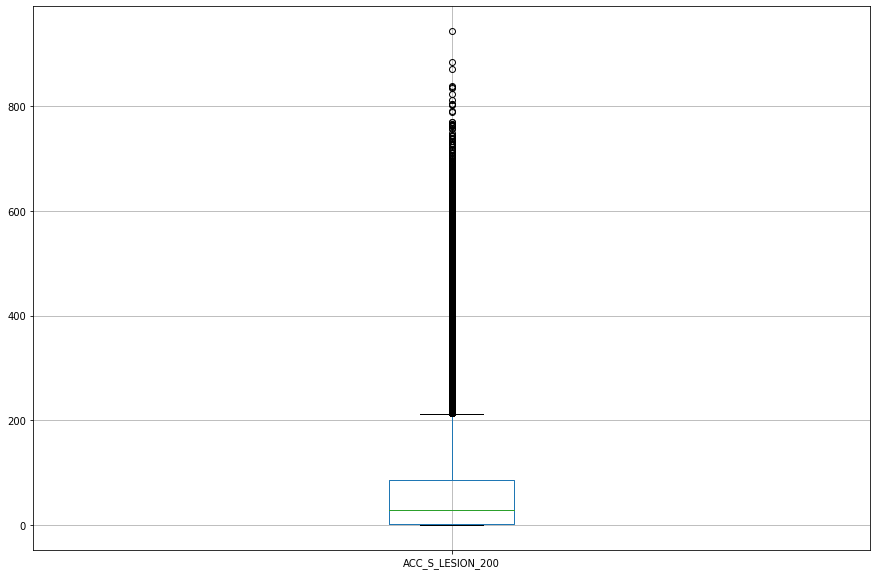

In [20]:
fig, ax = plt.subplots(figsize = (15, 10))
X[['ACC_S_LESION_200']].boxplot(ax = ax)


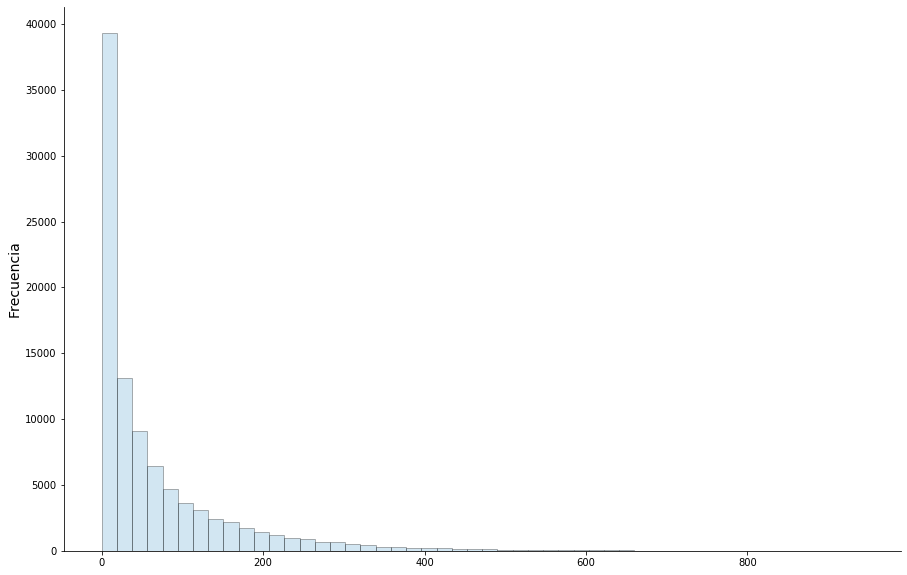

In [23]:
fig, ax = plt.subplots(figsize = (15, 10))

ax.hist(X['ACC_S_LESION_200'], bins = 50, color = '#6baed6',ec ='black',alpha=0.3, label = '2019')
#sns.kdeplot(X.ACC_S_LESION_200)
#ax.hist(reg3.pobreza, bins = dbins, ec ='black',color = '#74a9cf',alpha=0.5, label = 'MUN_REGRESION',density = True)
#plt.yscale('log')
ax.set_ylabel('Frecuencia',fontsize = 14)
#ax.set_xlabel('Porcentaje', fontsize = 14)
#plt.xticks(rotation = 45)
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)
#plt.xlim(0,8000)
#plt.text(1500, 6167951.32, "Col: Parque Ind. Eco. Leon/ Pob: 0/ Ventas: $6,167,951.32", horizontalalignment='left', size='medium', color='black', weight='semibold',fontsize = 12)
#plt.text(20, 120, r'N = 23,855, mean = 2.04,  std = 4.973,  max = 150,  min = 1', fontsize=14)
#plt.title("Población sin derechohabiencia", loc='left', fontsize=20, fontweight=0, color='darkred')

#plt.axvline(0.34082, color='#74c476', linewidth=2.5, linestyle = '--',alpha = 1)
#plt.text(0.32, 80, 'Tijuana 34%', color = 'green', rotation = 90, alpha = 1, fontsize=15)
#
#plt.axvline(0.23, color='#6baed6', linewidth=2.5, linestyle = '--',alpha = 1)
#plt.text(0.24, 80, 'Monterrey 23%', color = 'blue', rotation = 90, alpha = 1, fontsize=15)
#
#plt.axvline(0.35, color='#fd8d3c', linewidth=2.5, linestyle = '--',alpha = 1)
#plt.text(0.36, 80, 'Guadalajara 35%', color = 'red', rotation = 90, alpha = 1, fontsize=15)

#plt.text(hom1619_ts_m.iloc[36,0], 100, '  Cambio %\nSept19 vs. Dic18', color = 'green', alpha = 0.5, fontsize=18)
#ax.fill_between(rango1[3400:].DIAS,15,0, color='#756bb1', alpha=.2)
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left()

In [7]:
from numpy import unique
for i in range(X.shape[1]):
    num = len(unique(X.iloc[:, i]))
    percentage = float(num) / X.shape[0] * 100
    print('%d, %d, %.1f%%' % (i, num, percentage))

0, 4, 0.0%
1, 5, 0.0%
2, 6, 0.0%
3, 2, 0.0%
4, 3, 0.0%
5, 2, 0.0%
6, 9, 0.0%
7, 4, 0.0%
8, 3, 0.0%
9, 4, 0.0%
10, 8, 0.0%
11, 2, 0.0%
12, 2, 0.0%
13, 4, 0.0%
14, 3, 0.0%
15, 3, 0.0%
16, 4, 0.0%
17, 3, 0.0%
18, 9, 0.0%
19, 3, 0.0%
20, 9, 0.0%
21, 6, 0.0%
22, 4, 0.0%
23, 2, 0.0%
24, 4, 0.0%
25, 4, 0.0%
26, 8, 0.0%
27, 4, 0.0%
28, 4, 0.0%
29, 3, 0.0%
30, 17, 0.0%
31, 27, 0.0%
32, 8, 0.0%
33, 12, 0.0%
34, 5, 0.0%
35, 5, 0.0%
36, 58, 0.1%
37, 26, 0.0%
38, 18, 0.0%
39, 3, 0.0%
40, 26, 0.0%
41, 195, 0.2%
42, 8, 0.0%
43, 5, 0.0%
44, 479, 0.5%
45, 148, 0.2%
46, 11, 0.0%
47, 3, 0.0%
48, 28, 0.0%
49, 12, 0.0%
50, 20, 0.0%
51, 9, 0.0%
52, 4, 0.0%
53, 66, 0.1%
54, 268, 0.3%
55, 10, 0.0%
56, 5, 0.0%
57, 714, 0.8%
58, 236, 0.2%
59, 17, 0.0%
60, 3, 0.0%
61, 40, 0.0%
62, 15, 0.0%
63, 29, 0.0%
64, 9, 0.0%
65, 5, 0.0%
66, 73, 0.1%


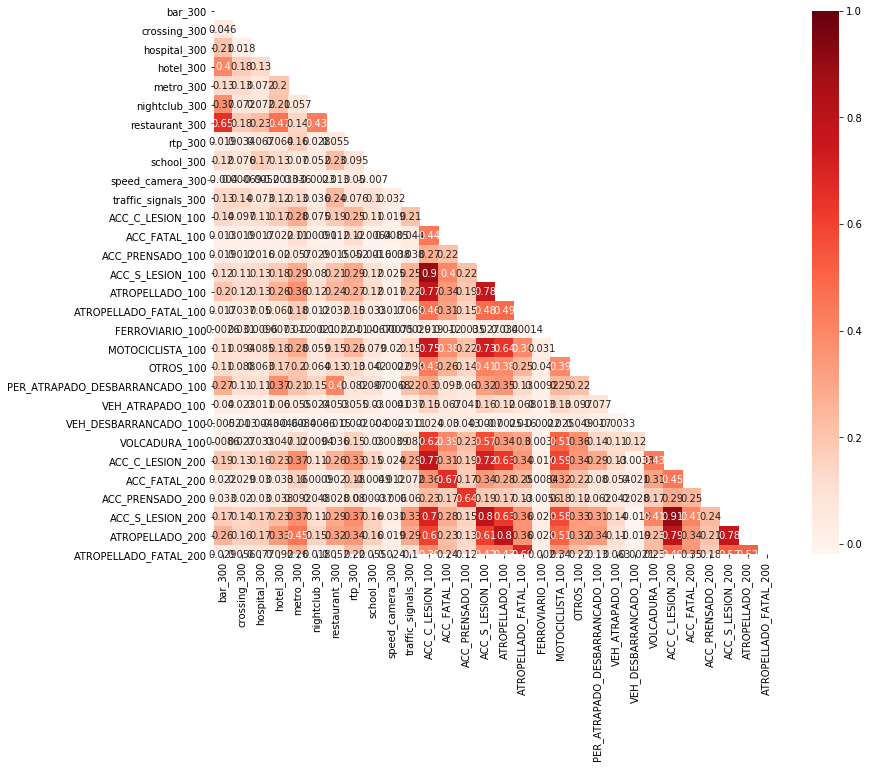

In [28]:
fig, ax = plt.subplots(figsize = (13,10))
matrix = np.triu(X.iloc[:,30:60].corr())
sns.heatmap(X.iloc[:,30:60].corr(), annot = True, mask = matrix, cmap = 'Reds', square=True, ax = ax)
#fig.savefig('/Users/daniel.rodriguez/Documents/2020/Montepío/METODOLOGÍA/corr_plot4.png', format = 'png', dpi = 200, bbox_inches = 'tight')

In [ ]:
g = sns.PairGrid(X.iloc[:,30:60], diag_sharey=False)
#g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Error in callback <function flush_figures at 0x120ab68c8> (for post_execute):
